<a href="https://colab.research.google.com/github/Ivlf/Ivana/blob/main/Copy_of_project2_data201_carprice_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Introduction: Give the details on the source of your data, its content, and some questions you are interested in. The data should have at least 1000 rows.
##### This dataset contains information about used cars.The dataset is from the car price prediction from kaggle, filled with information on a wide variety of used cars, including their selling price.The columns in the given dataset are as follows.
##### name: Name of the cars
##### year: Year of the car when it was bought
##### selling_price:Price at which the car is being sold
##### km_driven: Number of Kilometres the car is driven
##### fuel: Fuel type of car (petrol / diesel / CNG / LPG / electric)
##### seller_type: Tells if a Seller is Individual or a Dealer
##### transmission: Gear transmission of the car (Automatic/Manual)
##### Owner: Number of previous owners of the car.
##### mileage
##### engine
##### max_power
##### torque
##### seats
##### company

##### Reference Source:
##### https://www.kaggle.com/code/simtoor/car-price-prediction/data
##### https://stackoverflow.com/questions/58362473/what-does-black-lines-on-a-seaborn-barplot-mean
##### https://www.statology.org/good-r-squared-value/

### 2. Prepare and wrangle your data with Pandas and Numpy

######According to geeksforgeeks.org, Data Wrangling is difined "Data Wrangling is the process of gathering, collecting, and transforming Raw data into another format for better understanding, decision-making, accessing, and analysis in less time." It deals with data exploration, dealing with missing values, reshaping data, filtering dat, and etc.
######Source:https://www.geeksforgeeks.org/data-wrangling-in-python/

In [ ]:
# Import pandas packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# importe additional packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

### Data Exploration

In [ ]:
# Import a dataset and display data
car_dataset = pd.read_csv ('Car details v3.csv')
car_dataset.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
car_dataset.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
car_dataset.shape

(8128, 13)

### Check the data types of each of the columns and see how many null values exist in the data.

In [ ]:
car_dataset.columns # 13 columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
car_dataset.dtypes # a mix of int, float and object

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [ ]:
# Check the empty object
car_dataset.isnull().sum() # there are null values in mileage, engine, max_power, torque and seats

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
# Check the duplicates
car_dataset.duplicated(subset=None)

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126     True
8127     True
Length: 8128, dtype: bool

### Once we know different data types, we want to check the data for each category. So, we could prepare for the regression (change all object categories to numeric value). e.g., the below code lets you see the data frame filtered for only the ‘object’ type:

In [ ]:
car_dataset.select_dtypes(include=['object']) # show all object type columns

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm
8124,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)"
8125,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm
8126,Tata Indigo CR4,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm


##### Convert float to Int and remove unnecessary columns and rows

In [ ]:
# Remove null values
car_dataset=car_dataset.dropna()

In [ ]:
# Remove duplicates
car_dataset=car_dataset.drop_duplicates()

In [ ]:
# Change float to integer
car_dataset['seats']=car_dataset['seats'].astype(int)

In [ ]:
# Divide columns by a number
car_dataset['selling_price']=car_dataset['selling_price'].div(100)

In [ ]:
car_dataset.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
# Remove uncecessary columns
car_dataset=car_dataset[car_dataset["owner"] !="Test Drive Car"]
car_dataset.reset_index(drop=True, inplace=True)

In [ ]:
# Check the onwers
car_dataset.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

In [ ]:
# Check Null values
car_dataset.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [ ]:
# Identify the dimensions of the dataset after we clean the datase
car_dataset.shape


(6712, 13)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6712 entries, 0 to 6711
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6712 non-null   object 
 1   year           6712 non-null   int64  
 2   selling_price  6712 non-null   float64
 3   km_driven      6712 non-null   int64  
 4   fuel           6712 non-null   object 
 5   seller_type    6712 non-null   object 
 6   transmission   6712 non-null   object 
 7   owner          6712 non-null   object 
 8   mileage        6712 non-null   object 
 9   engine         6712 non-null   object 
 10  max_power      6712 non-null   object 
 11  torque         6712 non-null   object 
 12  seats          6712 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 681.8+ KB


In [ ]:
# Check values in each categories
print(car_dataset["fuel"].value_counts())
print(car_dataset["seller_type"].value_counts())
print(car_dataset["transmission"].value_counts())
print(car_dataset["owner"].value_counts())

Diesel    3657
Petrol    2969
CNG         51
LPG         35
Name: fuel, dtype: int64
Individual          6024
Dealer               661
Trustmark Dealer      27
Name: seller_type, dtype: int64
Manual       6141
Automatic     571
Name: transmission, dtype: int64
First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Name: owner, dtype: int64


In [ ]:
# Filter 
#car_dataset=car_dataset.drop(columns=['mileage','torque','max_power','engine','seats'])
#car_dataset

In [ ]:
car_dataset.shape

(6712, 13)

### 3. Use EDA principles and the Matplotlib / Seaborn packages to visualize the data.

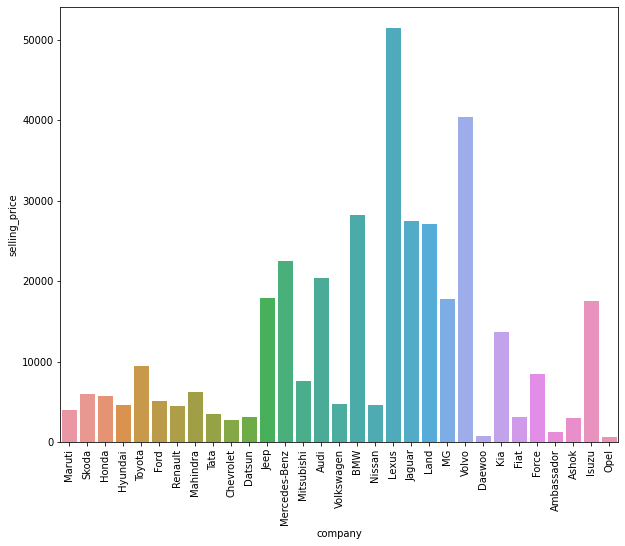

In [ ]:
# Visualize the dataset with barcharts which represent categorical data.
# Get company names from Name of the cars
name = car_dataset["name"]
names = []

for i in range(len(name)):
    c = str(name[i]).split(" ")[0]
    names.append(c)
    
car_dataset["company"] = pd.DataFrame(names)

plt.figure(figsize = (10,8))
plot = sns.barplot(y='selling_price', x='company', data=car_dataset,ci=None)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

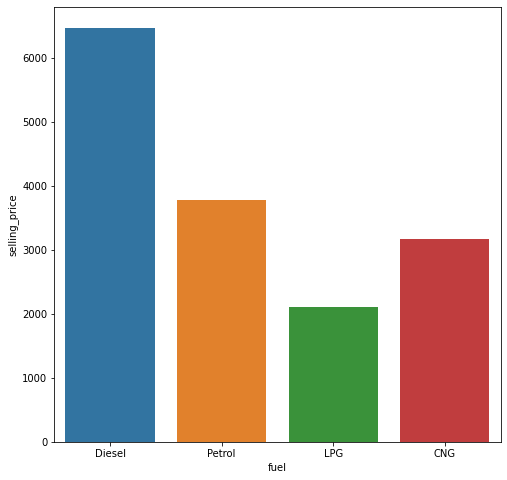

In [ ]:
plt.figure(figsize = (8,8))
plot = sns.barplot(y='selling_price', x='fuel', data=car_dataset,ci=None)
plt.setp(plot.get_xticklabels(), rotation=None)
plt.show()

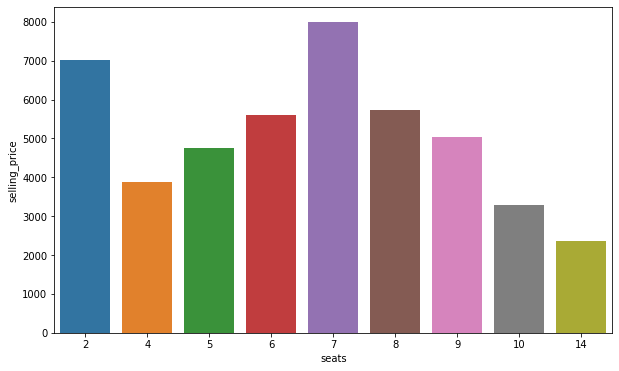

In [ ]:
plt.figure(figsize = (10,6))
plot = sns.barplot(y='selling_price', x='seats', data=car_dataset,ci=None)
plt.setp(plot.get_xticklabels(), rotation=None)
plt.show()

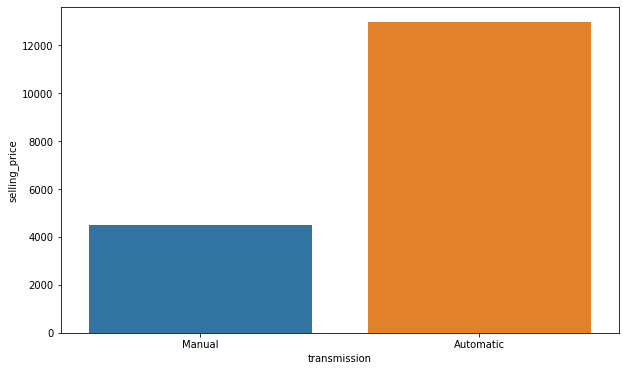

In [ ]:
plt.figure(figsize = (10,6))
plot = sns.barplot(y='selling_price', x='transmission', data=car_dataset, ci=None)
plt.setp(plot.get_xticklabels(), rotation=None)
plt.show()

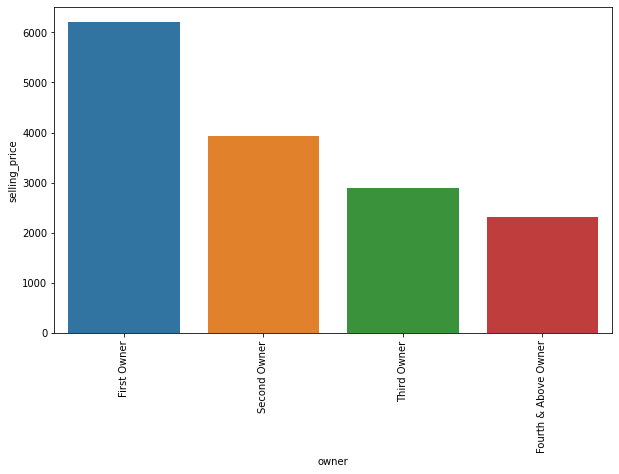

In [ ]:
plt.figure(figsize = (10,6))
plot = sns.barplot(y='selling_price', x='owner', data=car_dataset,ci=None)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

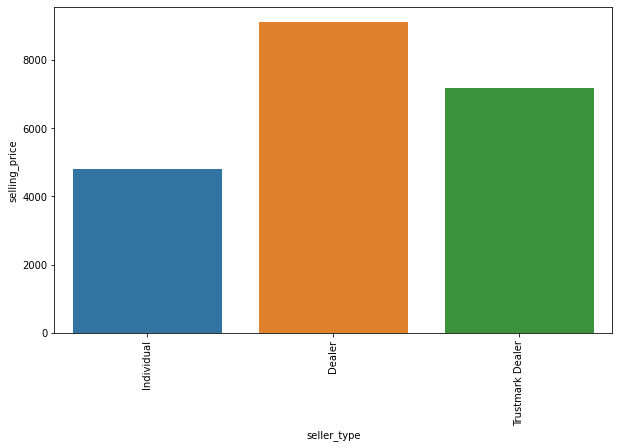

In [ ]:
plt.figure(figsize = (10,6))
plot = sns.barplot(y='selling_price', x='seller_type', data=car_dataset, ci=None)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

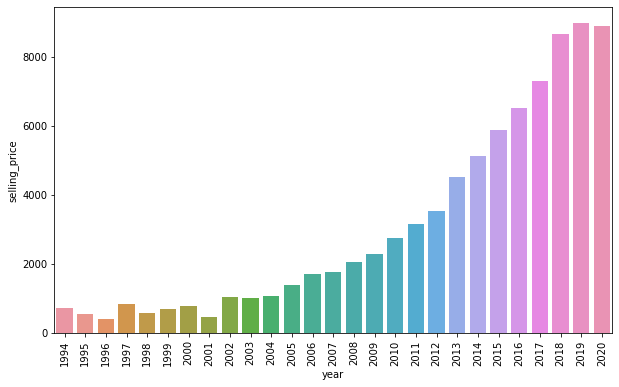

In [ ]:
plt.figure(figsize = (10,6))
plot = sns.barplot(y='selling_price', x='year', data=car_dataset, ci=None)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

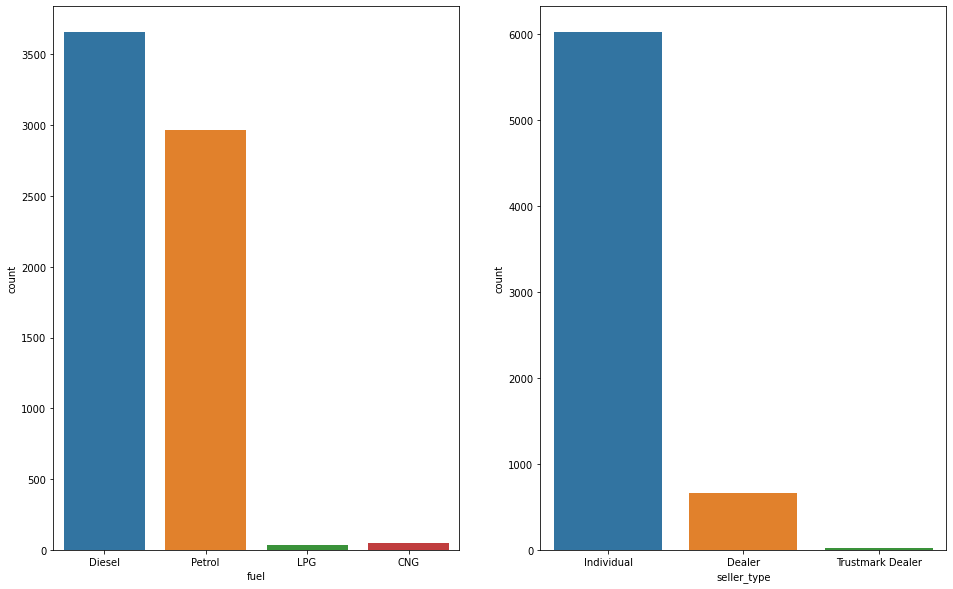

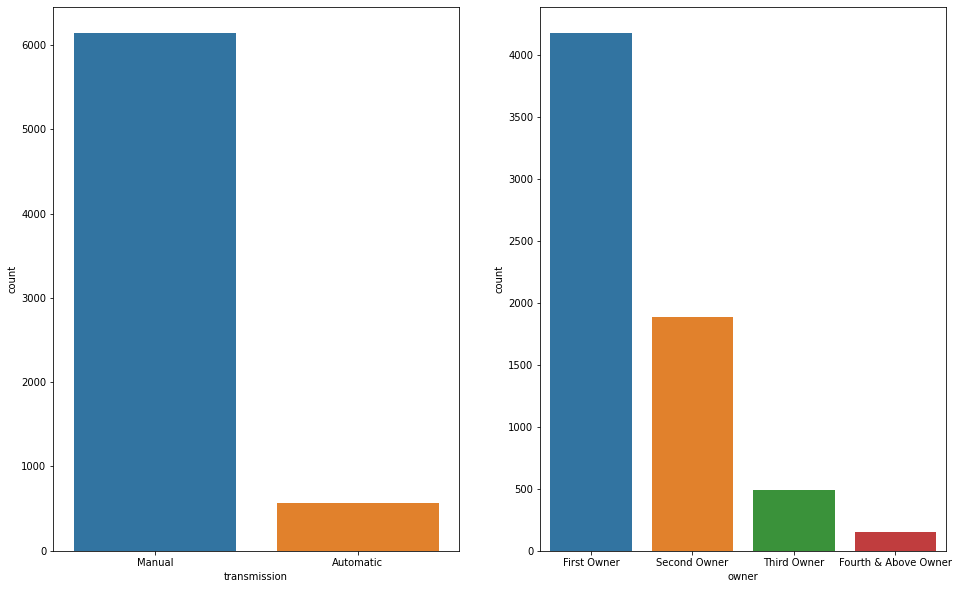

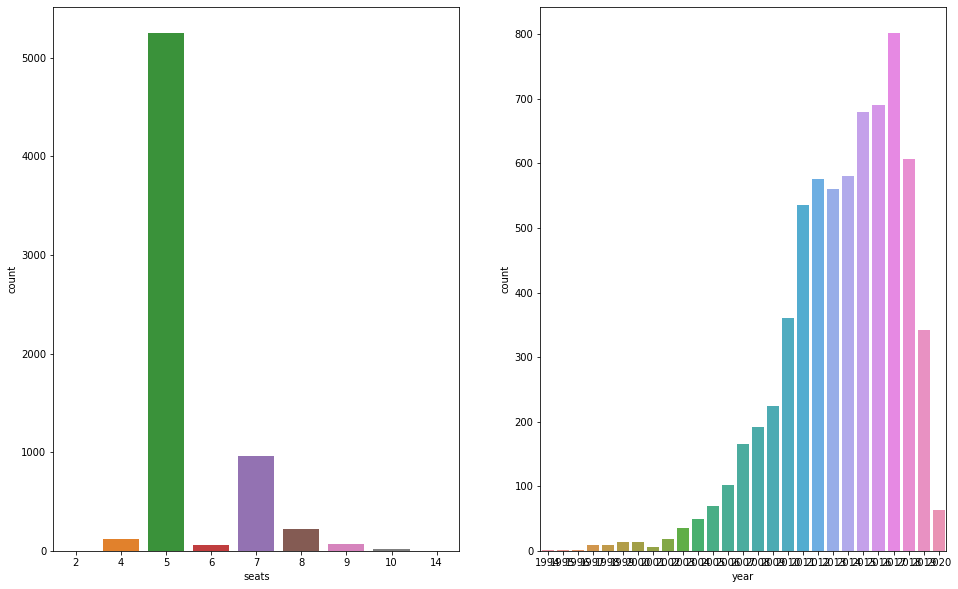

In [ ]:
# Graph by Count
cat_cols = ['fuel','seller_type','transmission','owner', 'seats', 'year']
i=0
while i < len(cat_cols):
    fig = plt.figure(figsize=[16,10])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=car_dataset)
    i += 1
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=car_dataset)
    i += 1
    
    plt.show()

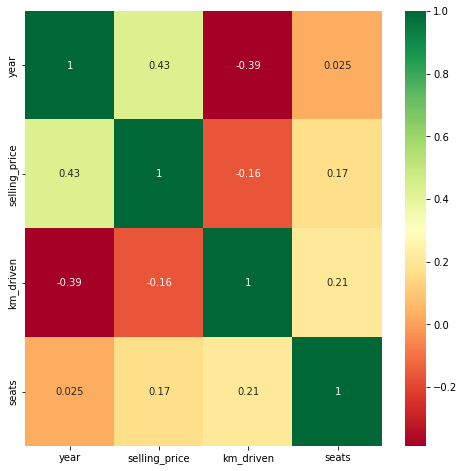

In [ ]:
# Heat Map 
plt.figure(figsize = (8,8))
sns.heatmap(car_dataset[car_dataset.columns].corr(), annot = True, cmap = "RdYlGn")
plt.show()

##### From the heatmap, selling price and year are closley related, and km driven and year works negatively.

### 4. Use scikit-learn linear regression to train, test and predict a numerical target variable. Use appropriate metric and interpret the meaning of the score.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [ ]:
# encoding "Fuel_Type" Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3}},inplace=True)
# encoding "Seller_Type" Column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
# encoding "Transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
# encoding "owner" Column
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company
0,Maruti Swift Dzire VDI,2014,4500.0,145500,1,1,0,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,3700.0,120000,1,1,0,1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Skoda
2,Honda City 2017-2020 EXi,2006,1580.0,140000,0,1,0,2,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Honda
3,Hyundai i20 Sportz Diesel,2010,2250.0,127000,1,1,0,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Hyundai
4,Maruti Swift VXI BSIII,2007,1300.0,120000,0,1,0,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Maruti


In [ ]:
# Find the keys of our dataframe
car_dataset.keys()

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'company'],
      dtype='object')

In [ ]:
print(car_dataset.dtypes)

name              object
year               int64
selling_price    float64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage           object
engine            object
max_power         object
torque            object
seats              int64
company           object
dtype: object


### Split the data and target.

In [ ]:
X = car_dataset.drop(columns=["selling_price"])
y = car_dataset['selling_price']

print(X)

                                   name  year  km_driven  fuel  seller_type  \
0                Maruti Swift Dzire VDI  2014     145500     1            1   
1          Skoda Rapid 1.5 TDI Ambition  2014     120000     1            1   
2              Honda City 2017-2020 EXi  2006     140000     0            1   
3             Hyundai i20 Sportz Diesel  2010     127000     1            1   
4                Maruti Swift VXI BSIII  2007     120000     0            1   
...                                 ...   ...        ...   ...          ...   
6707  Maruti Wagon R VXI BS IV with ABS  2013      50000     0            1   
6708         Hyundai i20 Magna 1.4 CRDi  2014      80000     1            1   
6709                  Hyundai i20 Magna  2013     110000     0            1   
6710              Hyundai Verna CRDi SX  2007     119000     1            1   
6711             Maruti Swift Dzire ZDi  2009     120000     1            1   

      transmission  owner     mileage   engine   ma

In [ ]:
print(y)

0       4500.0
1       3700.0
2       1580.0
3       2250.0
4       1300.0
         ...  
6707    2600.0
6708    4750.0
6709    3200.0
6710    1350.0
6711    3820.0
Name: selling_price, Length: 6712, dtype: float64


In [ ]:
# Checking the type of our arrays
print('The type of X is ', type(X))
print('The type of y is ', type(y))


The type of X is  <class 'pandas.core.frame.DataFrame'>
The type of y is  <class 'pandas.core.series.Series'>


In [ ]:
# Splitting the datasets into training (75%) and testing (25%)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(5034, 13)
(5034,)


In [ ]:
print(X_test.shape) 
print(y_test.shape)

(1678, 13)
(1678,)


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


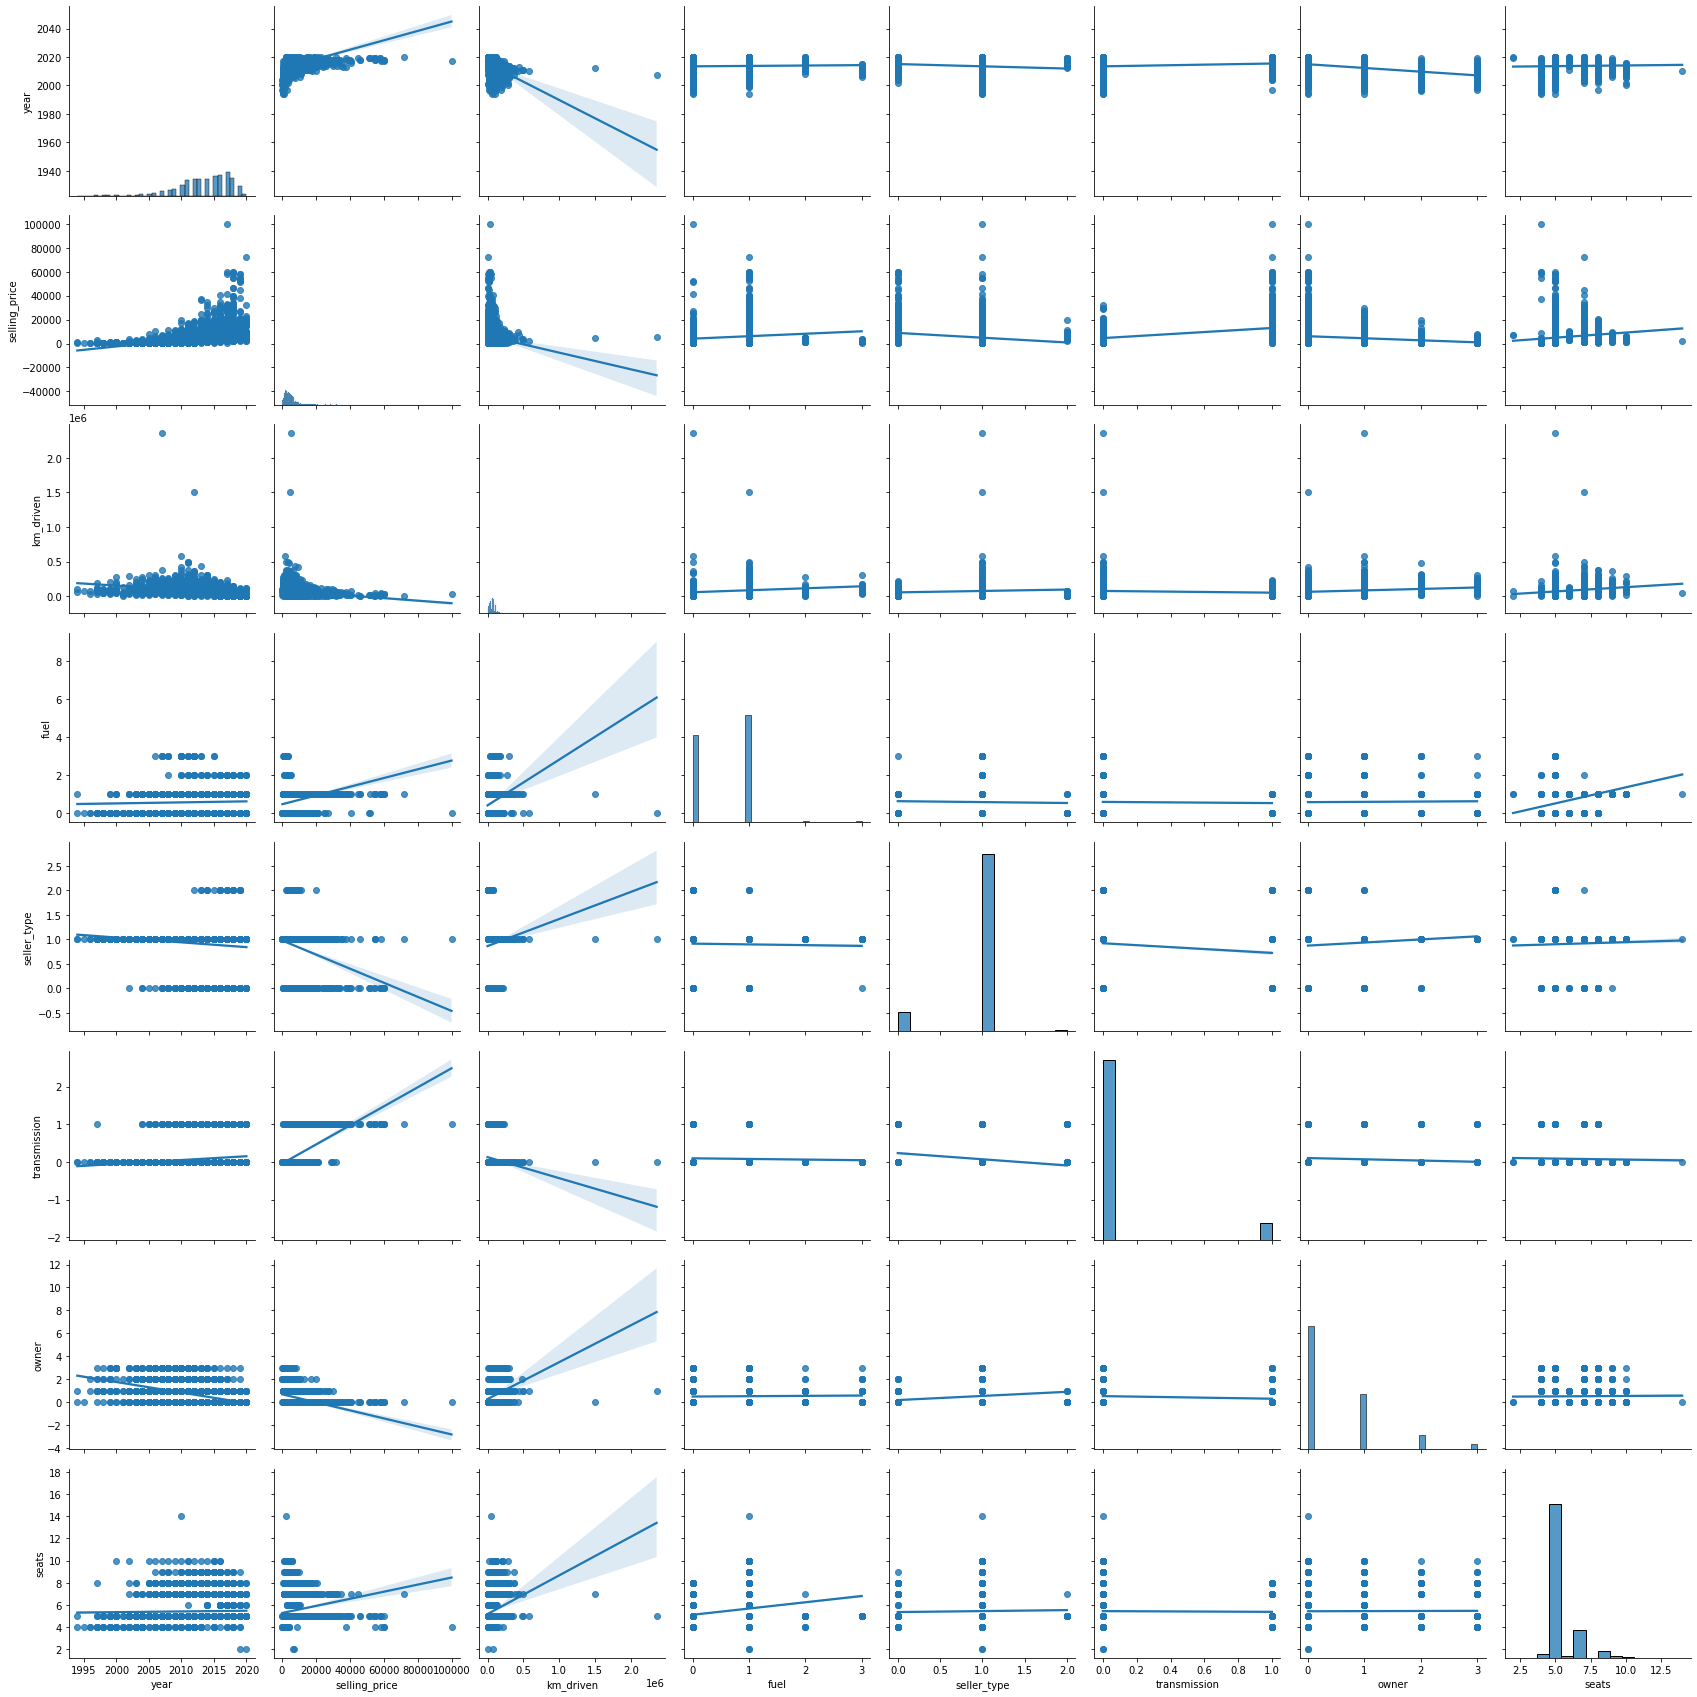

In [ ]:
sns.pairplot(car_dataset,kind = 'reg', size=3)

In [ ]:
# Model training
ohe = OneHotEncoder()
ohe.fit(X[["name", "company", "owner", "transmission", "seller_type", "fuel", "mileage", "engine", "max_power", "torque"]])

columns_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_), ["name", "company", "owner", "transmission", "seller_type", "fuel", "mileage", "engine", "max_power", "torque"]), remainder="passthrough")

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg =LinearRegression()

In [ ]:
LinReg = make_pipeline(columns_trans, LinReg)
LinReg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador CLASSIC 1500 DSL AC',
       'Ambassador Classic 2000 DSZ AC PS',
       'Ambassador Grand 1500 DSZ BSIII', ..., 'Volvo XC40 D4 R-Design',
       'Volvo XC60 Inscription D5 BSIV', 'Volvo XC90 T8 Excellence BSIV'],
      dtype=object),
                                                                            array(['Ambassador'...
       '95Nm@ 3000-4300rpm', '96  Nm at 3000  rpm ', '96 Nm at 3000 rpm',
       '96.1Nm@ 3000rpm', '96Nm@ 2500rpm', '96Nm@ 3000rpm',
       '96Nm@ 3500rpm', '98Nm@ 1600-3000rpm', '99.04Nm@ 4500rpm',
       '99.07Nm@ 4500rpm', '99.1Nm@ 4500rpm', '99.8Nm@ 2700rpm',
       '99Nm@ 4500rpm'], dtype=object)]),
                                                  ['name', 'company', 'owner',
                    

In [ ]:
# Linear Regression - Training 
lin_train_pred = LinReg.predict(X_train)
lin_train_pred

array([8419.59220532, 7871.7214546 , 2948.95882264, ..., -256.97129556,
       4138.28729263, 5808.49490745])

In [ ]:
# Linear Regression - Testing 
lin_test_pred = LinReg.predict(X_test)
lin_test_pred

array([7750.53439037, 5676.66190119, 2890.17767604, ..., 1554.54444626,
       6165.31802572, 9659.20373488])

##### What is a Good R-squared Value? 

In [ ]:
r2_score = metrics.r2_score(y_train, lin_train_pred)
print(f"Training: R Square: {r2_score}")


Training: R Square: 0.9739078387352449


##### We got the score of 97 percent. A high R-Squared value means that many data points are close to the linear regression function line. We assume the response variable, selling price, can be explained without error.

In [ ]:
r2_score = metrics.r2_score(y_test, lin_test_pred)
print(f"Testing: R Square: {r2_score}")

Testing: R Square: 0.7965099068019001


### 5. Plot a histogram of the residuals and check if they have a Gaussian distribution.

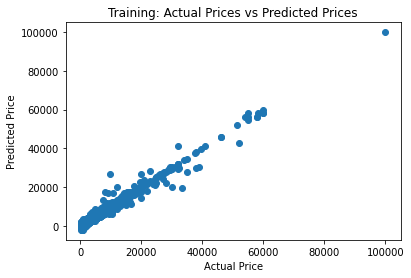

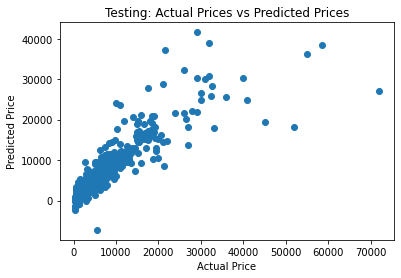

In [ ]:
plt.scatter(y_train, lin_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Training: Actual Prices vs Predicted Prices")
plt.show()

plt.scatter(y_test, lin_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Testing: Actual Prices vs Predicted Prices")
plt.show()

##### A normal probability plot of the residuals of the fitted model

### 7. Interpret the coefficients of the linear regression
